In [ ]:
def empty_cache():
    learn = None
    gc.collect()
    torch.cuda.empty_cache()

In [ ]:
empty_cache()

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
path=Path('/content/drive/My Drive/My_Dataset/modified_DS')
test_set_path= Path('/content/drive/MyDrive/test_set')

# change path
setting droupout to 0.3
momentum : 


In [5]:
def get_data():
    print(path)
    fnames_train = get_image_files(path, recurse=True)
    print(len(fnames_train))
    print(fnames_train[:5])
    # Data augmentation 
    
    ds_tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1,
                      max_lighting=0.2, max_warp=0.2, 
                      p_affine=0.75, p_lighting=0.75 ,xtra_tfms=[contrast(scale=(0.5, 1), p=0.75)])
    
    # ds_tfms = get_transforms(do_flip=False,
    #                      flip_vert=False,     # the image can be flipped vertically or rotated (p=0.5)   
    #                      max_lighting=0.4,   # a random lightning and contrast change
    #                      max_zoom=1.2,
    #                      max_warp=0.4)
    return (ds_tfms, path)
    

# change data

In [6]:
def prepare_data(size, bs, wd, model, valid_pct, ps):
    ds_tfms, path=  get_data()
    np.random.seed(150)
    # run this for finding predictins on test set
    data = ImageDataBunch.from_folder(path, train= '.' , test=test_set_path, ds_tfms=None,
                                size=size, bs=bs
                                ).normalize(imagenet_stats)

    # data = ImageDataBunch.from_folder(path, train= '.' , valid_pct= valid_pct, ds_tfms=ds_tfms,
    #                             size=size, bs=bs
    #                             ).normalize(imagenet_stats)
    
    print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))
    data.show_batch(rows=6, figsize=(10,10))
    kappa = KappaScore()
    kappa.weights = "quadratic"
    learn = cnn_learner(data=data, base_arch=model, metrics=[error_rate, accuracy,
               kappa], wd=wd, ps=ps)
    return learn


In [7]:
def train(train_head, cyc_len, lr1, lr2, wd, model_name):
    if train_head:
        learn.freeze()
        learn.fit_one_cycle(cyc_len, max_lr=slice(lr1),  callbacks=[ShowGraph(learn), SaveModelCallback(learn)], wd=wd)
        learn.save(model_name)
    else:
#    EarlyStoppingCallback(learn=learn, min_delta=0.01, patience=3  )                                                                
        learn.fit_one_cycle(cyc_len, max_lr=slice(lr1, lr2), callbacks=[ShowGraph(learn), SaveModelCallback(learn)], wd=wd)
        learn.save(model_name)

In [ ]:
path_1='/content/drive/My Drive/My_Dataset/modified_DS'
a=os.listdir(path_1)
print(a)

for i in a:
  print(i, len(os.listdir(path_1+'/'+i)))

['giloy', 'Peppermint', 'papaya', 'drumstick', 'cinnamon', 'AloeVera', 'coriander', 'Neem', 'Stevia', 'Basil', 'models']
giloy 450
Peppermint 450
papaya 450
drumstick 450
cinnamon 450
AloeVera 450
coriander 450
Neem 450
Stevia 450
Basil 450
models 3


# change valid_pct, model_name and last layer droupout

/content/drive/My Drive/My_Dataset/modified_DS
4500
[PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000013.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000327.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000292.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000025.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000329.jpg')]
['AloeVera', 'Basil', 'Neem', 'Peppermint', 'Stevia', 'cinnamon', 'coriander', 'drumstick', 'giloy', 'papaya'] 10 3150 1350
Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): AdaptiveMaxPool2d(output_size=1)
  (2): Flatten()
  (3): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.25, inplace=False)
  (5): Linear(in_features=4096, out_features=512, bias=True)
  (6): ReLU(inplace=True)
  (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropo

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


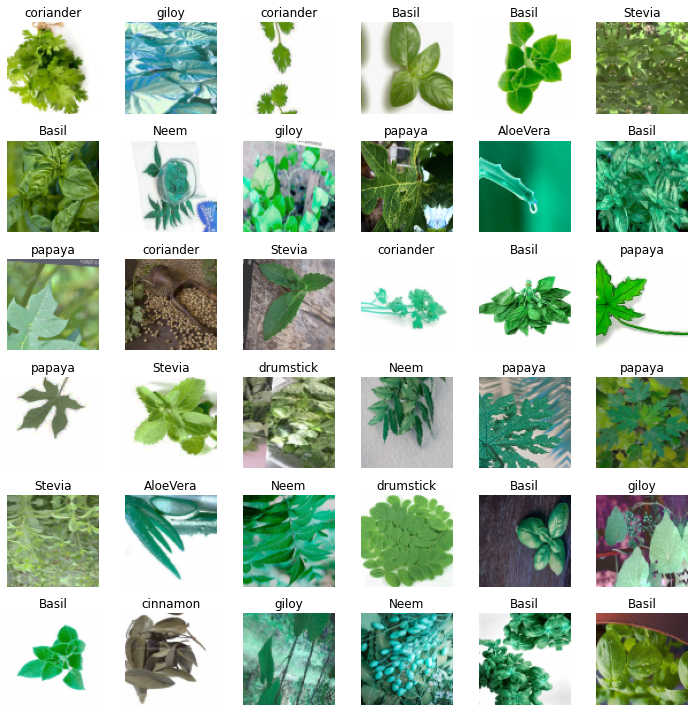

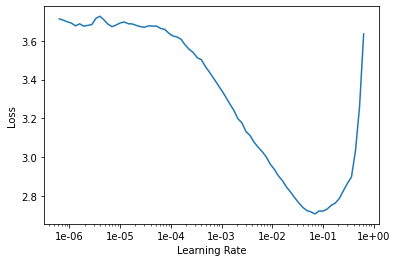

In [ ]:
# stage 1
learn= prepare_data(size=80, bs=120, wd=0.1,valid_pct=.30, model=models.resnet50, ps=0.5)
print(learn.layer_groups[2])
learn.lr_find()
learn.recorder.plot()

In [ ]:
# learn.recorder.plot_lr(show_moms=True)

# change model_name, epochs, learning rate here

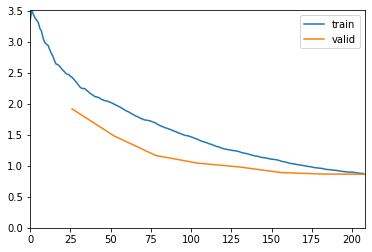

Better model found at epoch 0 with valid_loss value: 1.9166892766952515.
Better model found at epoch 1 with valid_loss value: 1.4826061725616455.
Better model found at epoch 2 with valid_loss value: 1.165573239326477.
Better model found at epoch 3 with valid_loss value: 1.0424776077270508.
Better model found at epoch 4 with valid_loss value: 0.9804130792617798.
Better model found at epoch 5 with valid_loss value: 0.8897367119789124.
Better model found at epoch 6 with valid_loss value: 0.8666509389877319.
Better model found at epoch 7 with valid_loss value: 0.8626930713653564.


In [ ]:
# train the head
train_head= True
train(train_head, cyc_len=8, lr1=8e-3, lr2= None, wd=0.1, model_name='freezed_80_120')

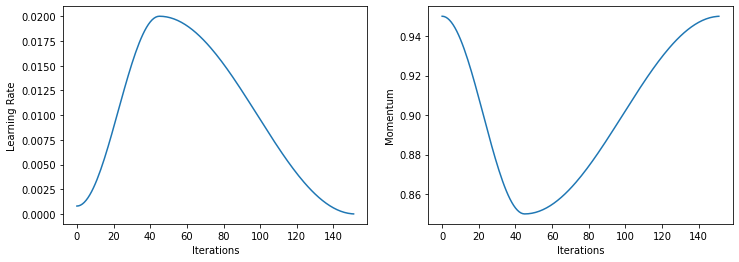

In [ ]:
learn.recorder.plot_lr(show_moms=True)

/content/drive/My Drive/My_Dataset/modified_DS
4500
[PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000013.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000327.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000292.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000025.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000329.jpg')]
['AloeVera', 'Basil', 'Neem', 'Peppermint', 'Stevia', 'cinnamon', 'coriander', 'drumstick', 'giloy', 'papaya'] 10 3150 1350


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05
Min loss divided by 10: 1.20E-04


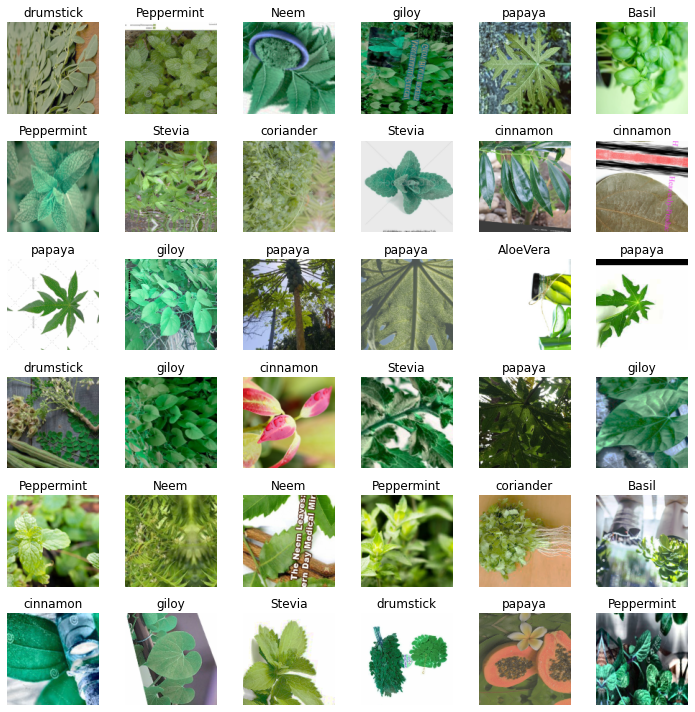

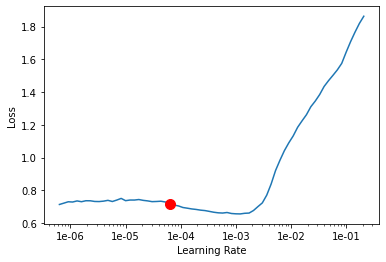

In [ ]:
# stage 2
# unfreeze the model
learn= prepare_data(size=128, bs=96, valid_pct=.30,wd=0.1, model=models.resnet50, ps=0.5)
learn.load('freezed_80_120')
# empty_cache()
train_head= False
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

# change lr and model name

# 1e-5, 3e-3 (LR)


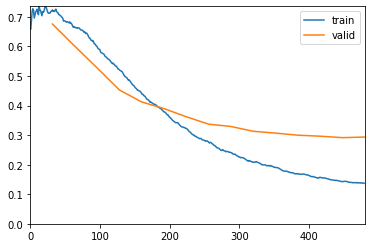

Better model found at epoch 0 with valid_loss value: 0.6757544875144958.
Better model found at epoch 1 with valid_loss value: 0.600894570350647.
Better model found at epoch 2 with valid_loss value: 0.5275306701660156.
Better model found at epoch 3 with valid_loss value: 0.4527154862880707.
Better model found at epoch 4 with valid_loss value: 0.4121597409248352.
Better model found at epoch 5 with valid_loss value: 0.38966506719589233.
Better model found at epoch 6 with valid_loss value: 0.3619844317436218.
Better model found at epoch 7 with valid_loss value: 0.33702021837234497.
Better model found at epoch 8 with valid_loss value: 0.32915547490119934.
Better model found at epoch 9 with valid_loss value: 0.31284865736961365.
Better model found at epoch 10 with valid_loss value: 0.3067117929458618.
Better model found at epoch 11 with valid_loss value: 0.29969802498817444.
Better model found at epoch 12 with valid_loss value: 0.2962525188922882.
Better model found at epoch 13 with valid_lo

In [ ]:
train_head= False
train(train_head, cyc_len=15, lr1=1e-5, lr2= 1e-4,  wd=0.1, model_name='unfreezed_128_96')

/content/drive/My Drive/My_Dataset/modified_DS
4500
[PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000013.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000327.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000292.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000025.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000329.jpg')]
['AloeVera', 'Basil', 'Neem', 'Peppermint', 'Stevia', 'cinnamon', 'coriander', 'drumstick', 'giloy', 'papaya'] 10 3150 1350


Learner(data=ImageDataBunch;

Train: LabelList (3150 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
giloy,giloy,giloy,giloy,giloy
Path: /content/drive/My Drive/My_Dataset/modified_DS;

Valid: LabelList (1350 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
AloeVera,AloeVera,papaya,Peppermint,papaya
Path: /content/drive/My Drive/My_Dataset/modified_DS;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (b

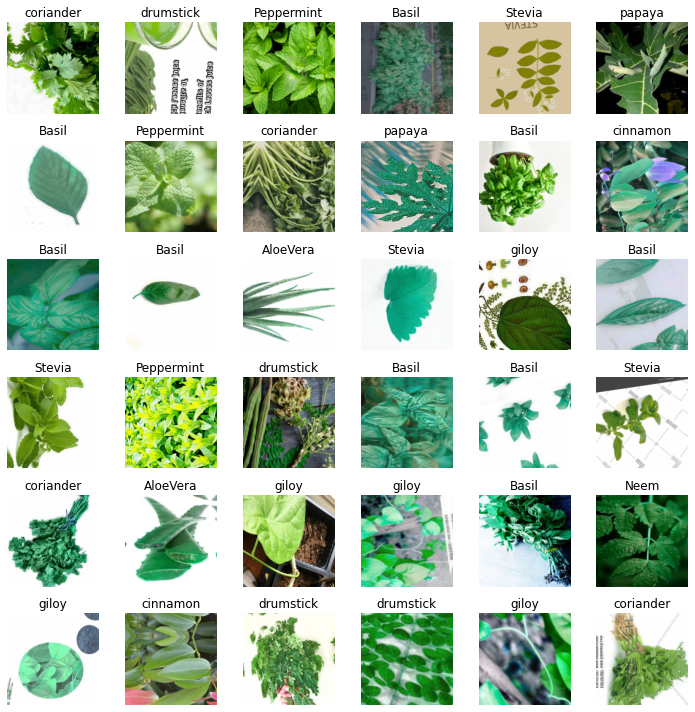

In [ ]:
train_head= True
learn.freeze()
learn= prepare_data(size=150, bs=80, wd=0.1, model=models.resnet50, valid_pct=.30, ps=0.3)
learn.load('unfreezed_128_96')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-06


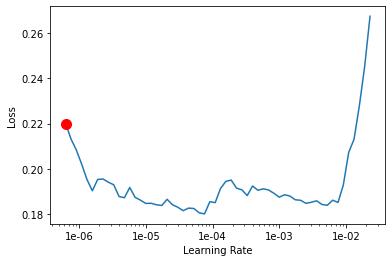

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

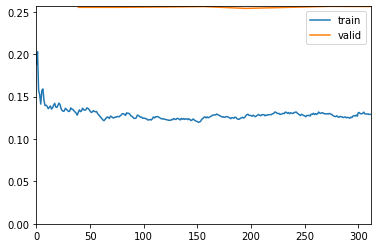

Better model found at epoch 0 with valid_loss value: 0.25526362657546997.
Better model found at epoch 4 with valid_loss value: 0.25399482250213623.


In [ ]:
train(train_head, cyc_len=8, lr1=5e-7, lr2= None,  wd=0.1, model_name='freezed_150_80')

/content/drive/My Drive/My_Dataset/modified_DS
4500
[PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000013.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000327.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000292.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000025.jpg'), PosixPath('/content/drive/My Drive/My_Dataset/modified_DS/giloy/00000329.jpg')]
['AloeVera', 'Basil', 'Neem', 'Peppermint', 'Stevia', 'cinnamon', 'coriander', 'drumstick', 'giloy', 'papaya'] 10 3150 1350


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-04
Min loss divided by 10: 4.37E-04


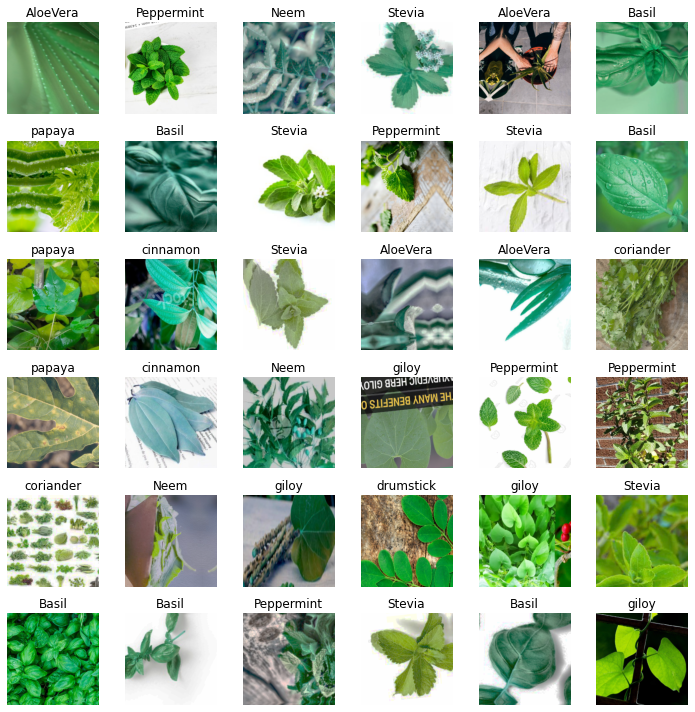

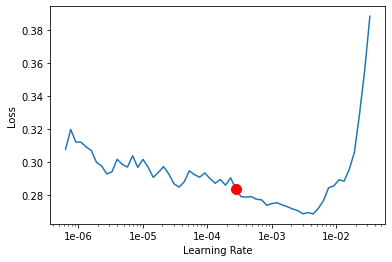

In [ ]:
train_head= False
learn.unfreeze()
learn= prepare_data(size=220, bs=50, wd=0.1, valid_pct=.30,  model=models.resnet50, ps=0.5)
learn.load('unfreezed_128_96')
learn.lr_find()
learn.recorder.plot(suggestion=True)

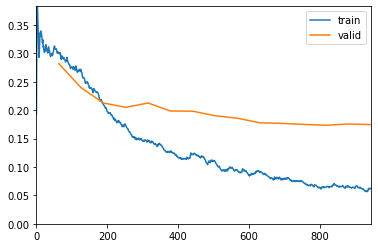

Better model found at epoch 0 with valid_loss value: 0.28188082575798035.
Better model found at epoch 1 with valid_loss value: 0.23949311673641205.
Better model found at epoch 2 with valid_loss value: 0.21266859769821167.
Better model found at epoch 3 with valid_loss value: 0.20490561425685883.
Better model found at epoch 5 with valid_loss value: 0.198543518781662.
Better model found at epoch 6 with valid_loss value: 0.1982092559337616.
Better model found at epoch 7 with valid_loss value: 0.19022755324840546.
Better model found at epoch 8 with valid_loss value: 0.18584725260734558.
Better model found at epoch 9 with valid_loss value: 0.17781420052051544.
Better model found at epoch 10 with valid_loss value: 0.17672206461429596.
Better model found at epoch 11 with valid_loss value: 0.17488746345043182.
Better model found at epoch 12 with valid_loss value: 0.17345701158046722.


In [ ]:
train(train_head, cyc_len=15, lr1=1e-4, lr2=8e-4,  wd=0.1, model_name='unfreezed_220_50')

# Visualize the results

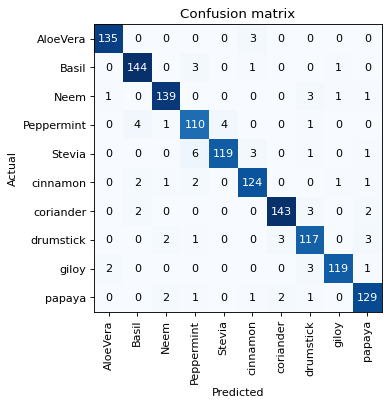

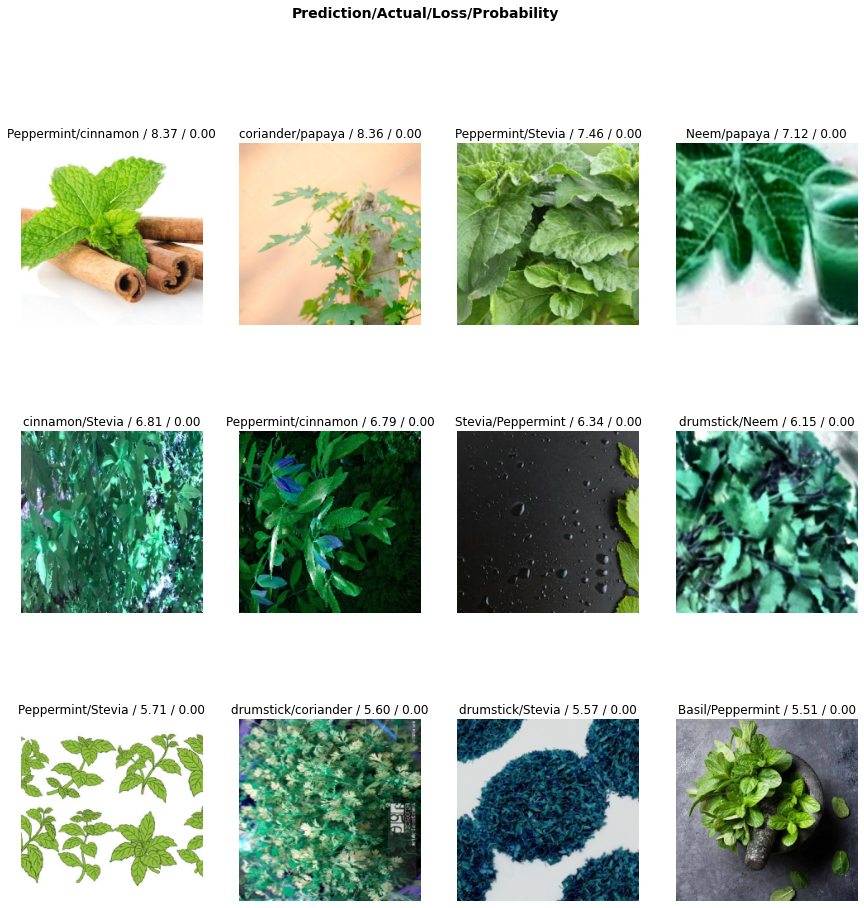

In [ ]:
# learn= prepare_data(size=220, bs=50, wd=0.1, model=models.resnet50, ps=0.3)
# learn.load('unfreezed_128_96_stage1')

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=80)
interp.most_confused(min_val=2)
interp.plot_top_losses(12, figsize=(15,15), heatmap=False)

In [ ]:
# learn= prepare_data(size=220, bs=50, wd=0.1, valid_pct=.30,  model=models.resnet50, ps=0.5)
learn.load('/content/drive/MyDrive/My_Dataset/models/unfreezed_220_50')

Learner(data=ImageDataBunch;

Train: LabelList (3150 items)
x: ImageList
Image (3, 220, 220),Image (3, 220, 220),Image (3, 220, 220),Image (3, 220, 220),Image (3, 220, 220)
y: CategoryList
giloy,giloy,giloy,giloy,giloy
Path: /content/drive/My Drive/My_Dataset/modified_DS;

Valid: LabelList (1350 items)
x: ImageList
Image (3, 220, 220),Image (3, 220, 220),Image (3, 220, 220),Image (3, 220, 220),Image (3, 220, 220)
y: CategoryList
AloeVera,AloeVera,papaya,Peppermint,papaya
Path: /content/drive/My Drive/My_Dataset/modified_DS;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (b

In [ ]:
learn.export('final_model.pkl')

In [29]:
# Predictions
test = ImageList.from_folder(test_set_path)
print(test)

ImageList (34 items)
Image (3, 1280, 1241),Image (3, 1060, 958),Image (3, 1156, 867),Image (3, 1156, 867),Image (3, 1156, 867)
Path: /content/drive/MyDrive/test_set


In [30]:
learn = load_learner(path, file = 'final_model.pkl', test = test)

In [31]:
thresh = 0.5
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [32]:
import pandas as pd
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn.data.test_ds.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv('/content/drive/My Drive/My_Dataset/modified_DS/result.csv', index=False)